# House Price Prediction

Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder as ohe

Get the Data

In [2]:
data=pd.read_csv(r"Housing.csv")

In [3]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
data.shape

(545, 13)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [6]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


Data Cleaning

In [7]:
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

Replace Value :

In [8]:
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [9]:
data.replace({'mainroad':{"yes":1, "no":0},
            'guestroom':{"yes":1,"no":0},
            'airconditioning':{"yes":1,"no":0}},inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_21812\2677504393.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'mainroad':{"yes":1, "no":0},


In [10]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,no,no,1,2,yes,furnished
1,12250000,8960,4,4,4,1,0,no,no,1,3,no,furnished
2,12250000,9960,3,2,2,1,0,yes,no,0,2,yes,semi-furnished
3,12215000,7500,4,2,2,1,0,yes,no,1,3,yes,furnished
4,11410000,7420,4,1,2,1,1,yes,no,1,2,no,furnished


In [11]:
data.shape

(545, 13)

Split the data

In [12]:
X=data.drop(['stories','basement','hotwaterheating','prefarea','furnishingstatus','price'],axis=1)
Y=data['price']

In [13]:
X

,area,bedrooms,bathrooms,mainroad,guestroom,airconditioning,parking
0,7420,4,2,1,0,1,2
1,8960,4,4,1,0,1,3
2,9960,3,2,1,0,0,2
3,7500,4,2,1,0,1,3
4,7420,4,1,1,1,1,2
...,...,...,...,...,...,...,...
540,3000,2,1,1,0,0,2
541,2400,3,1,0,0,0,0
542,3620,2,1,1,0,0,0
543,2910,3,1,0,0,0,0


In [14]:
X.shape

(545, 7)

In [15]:
Y

0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64

In [16]:
Y.shape

(545,)

In [17]:
X

,area,bedrooms,bathrooms,mainroad,guestroom,airconditioning,parking
0,7420,4,2,1,0,1,2
1,8960,4,4,1,0,1,3
2,9960,3,2,1,0,0,2
3,7500,4,2,1,0,1,3
4,7420,4,1,1,1,1,2
...,...,...,...,...,...,...,...
540,3000,2,1,1,0,0,2
541,2400,3,1,0,0,0,0
542,3620,2,1,1,0,0,0
543,2910,3,1,0,0,0,0


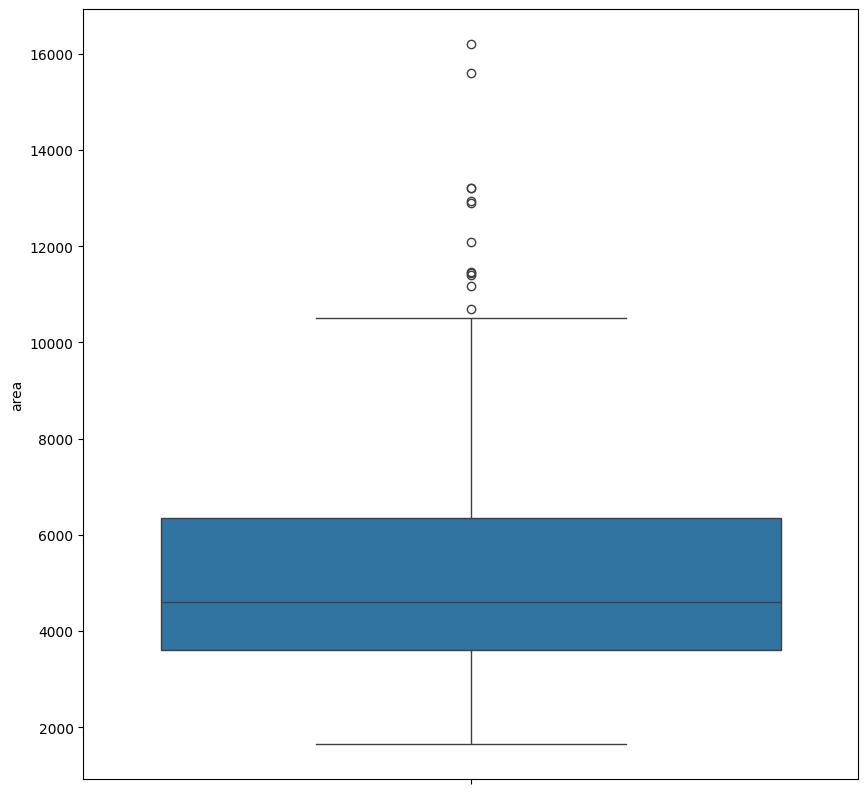

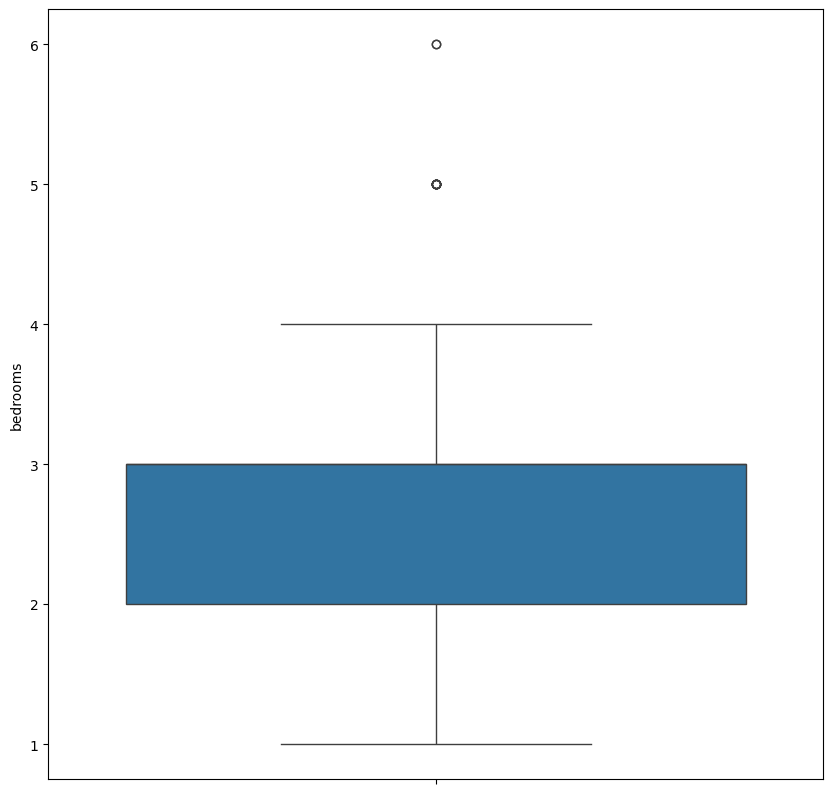

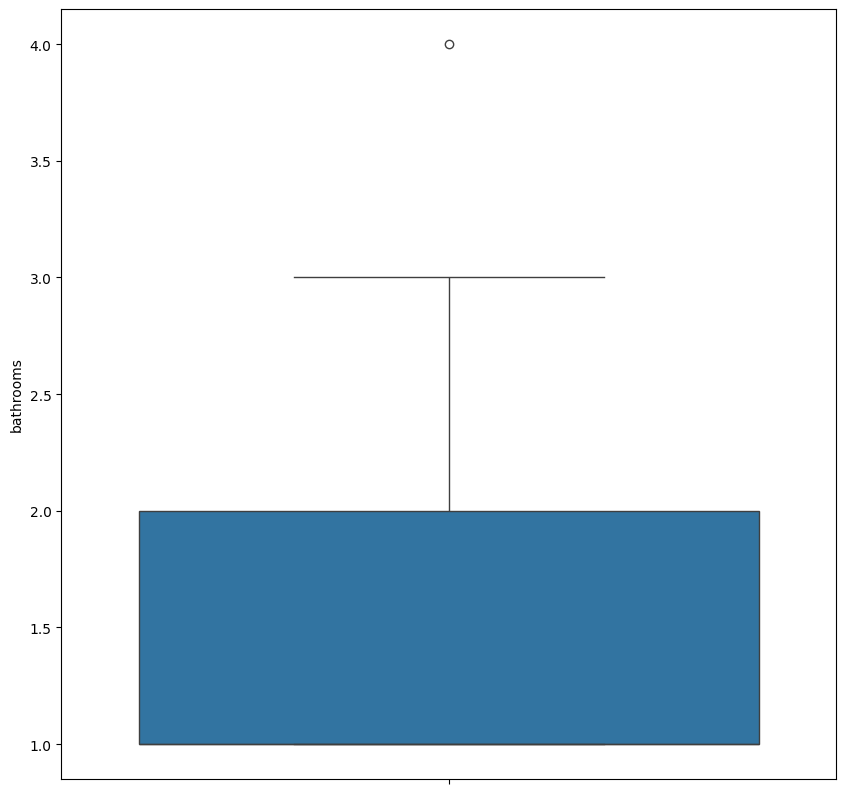

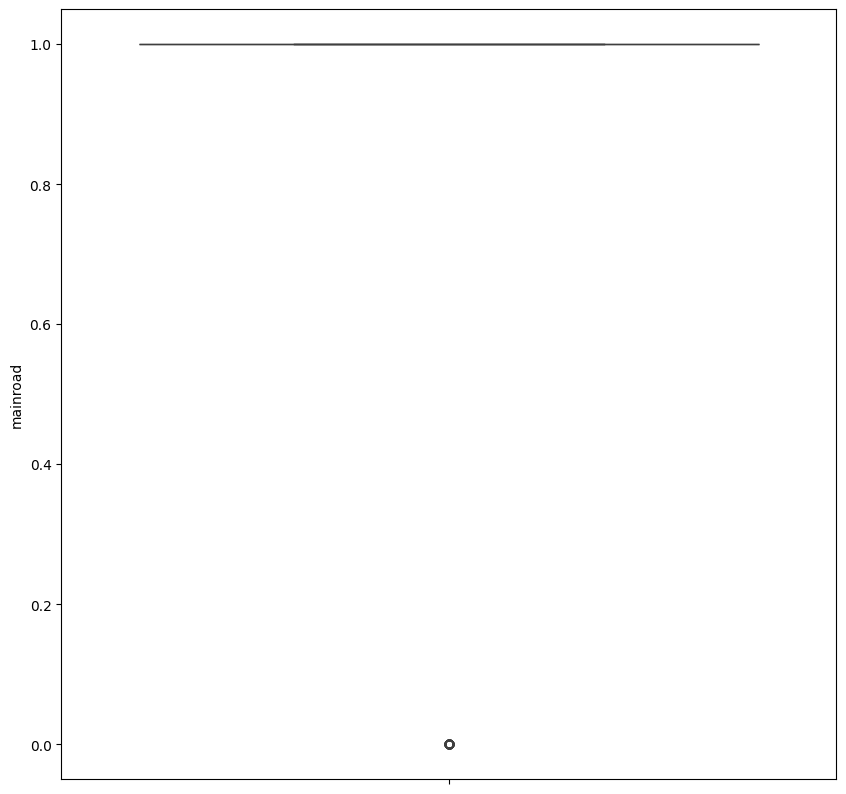

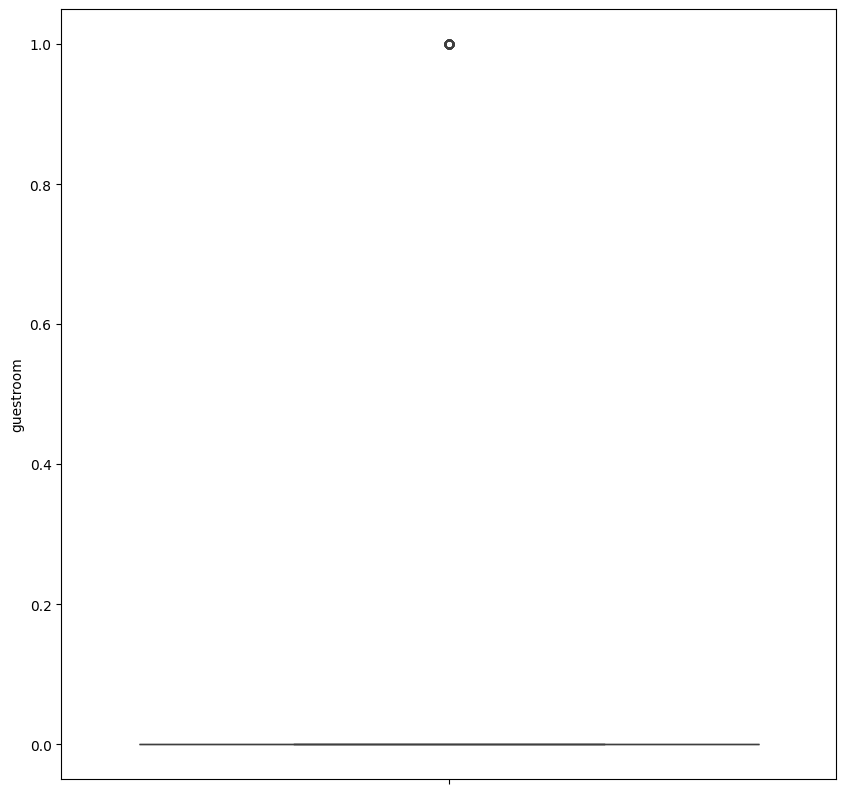

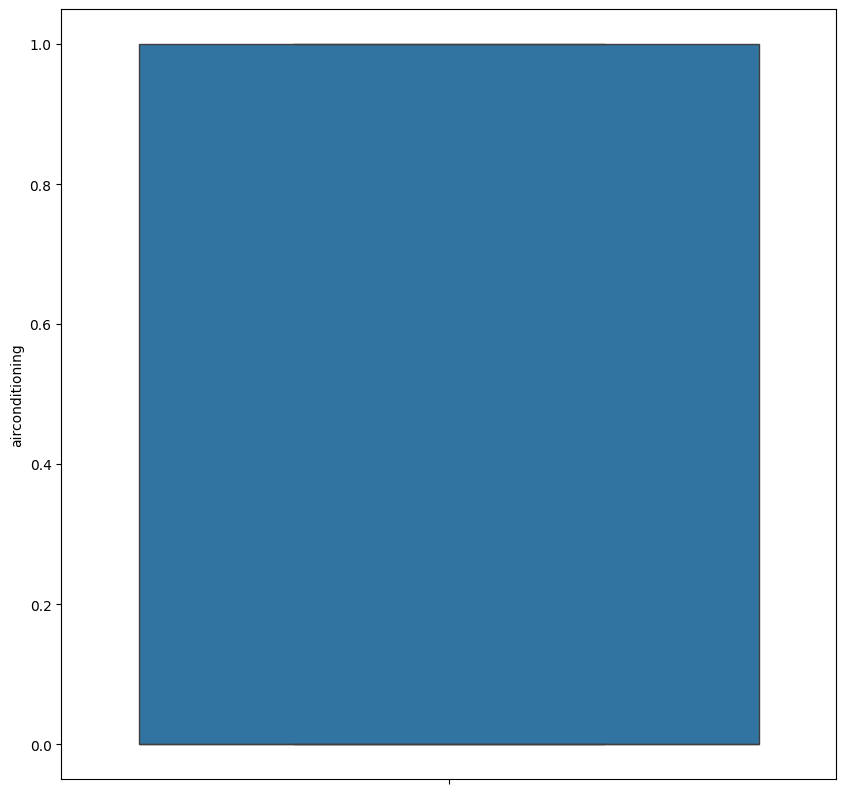

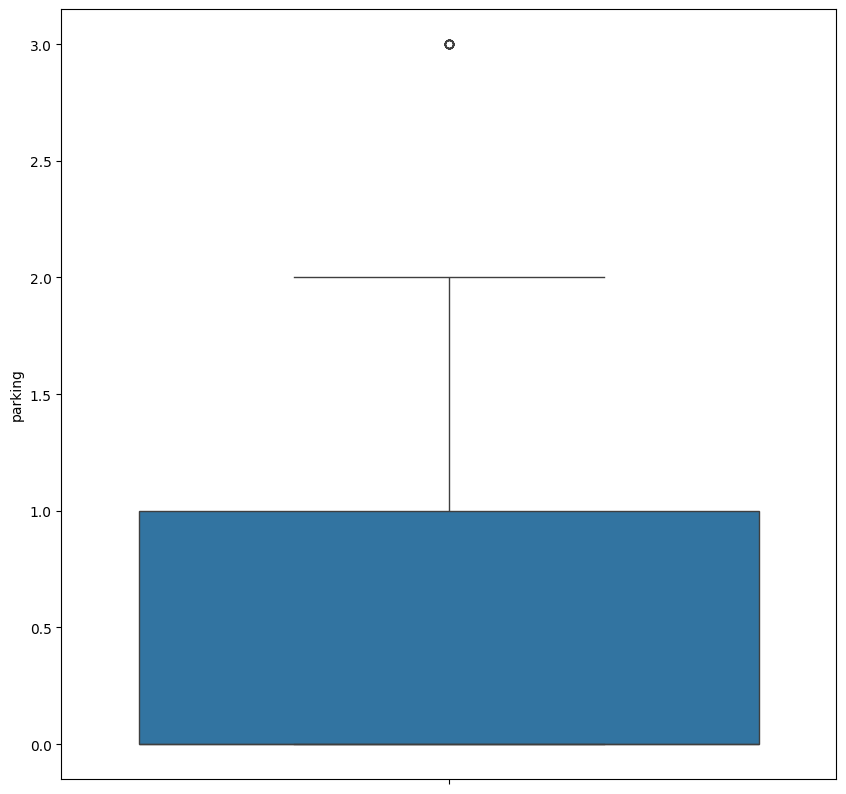

In [18]:
for col in X:
    plt.figure(figsize=(10,10))
    sns.boxplot(data[col])
    plt.show()

In [19]:
data[data['area']>11000].index

Index([7, 10, 56, 64, 66, 69, 125, 129, 186, 211, 403], dtype='int64')

In [20]:
data.drop(index=[7, 10, 56, 64, 66, 69, 125, 129, 186, 211, 403],inplace=True)


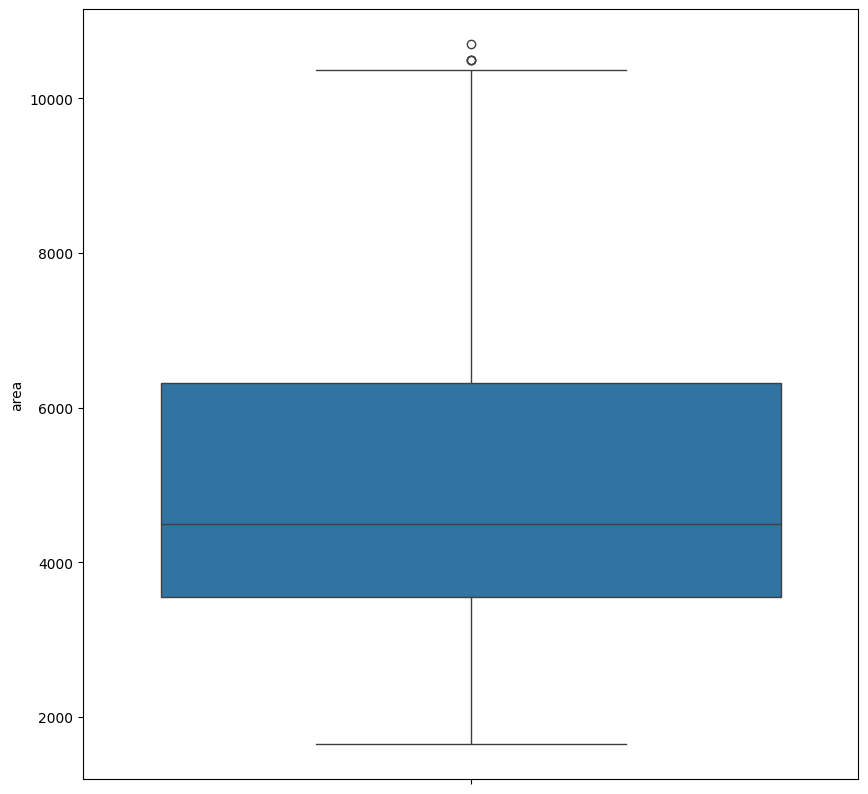

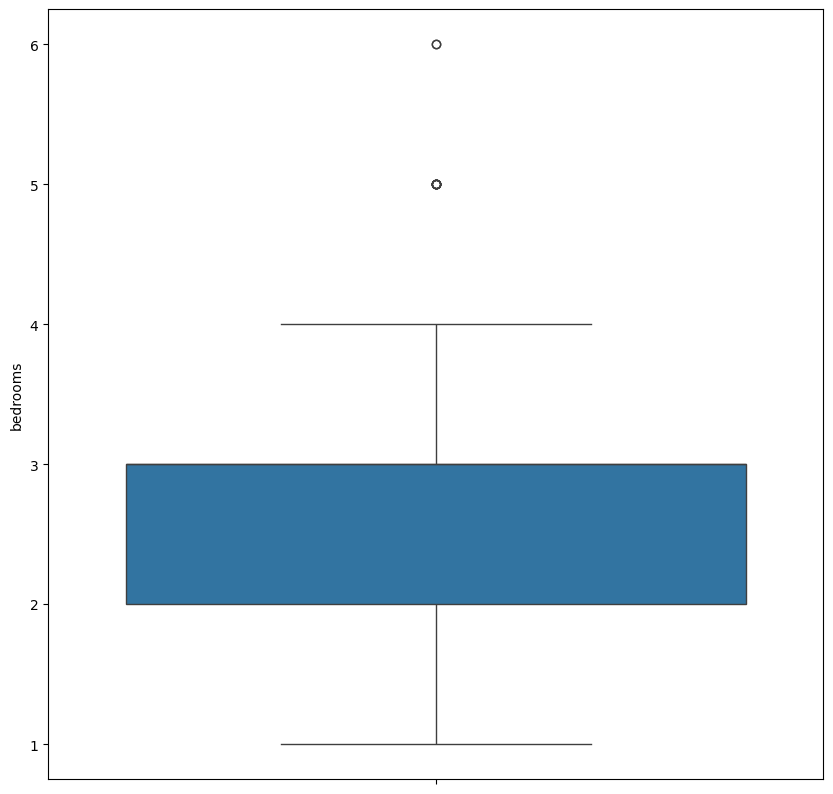

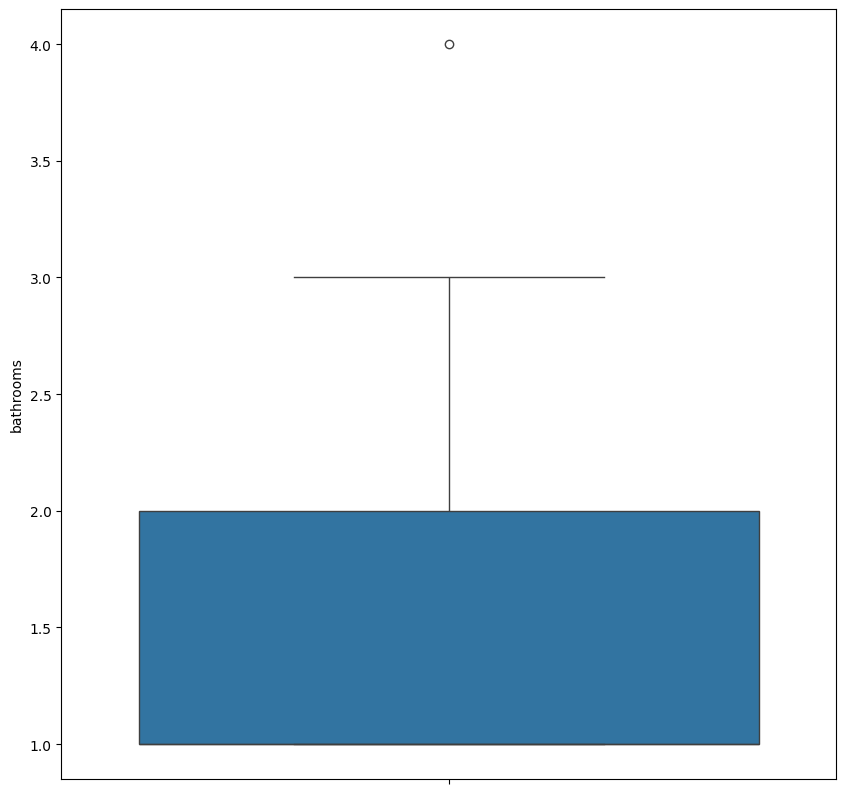

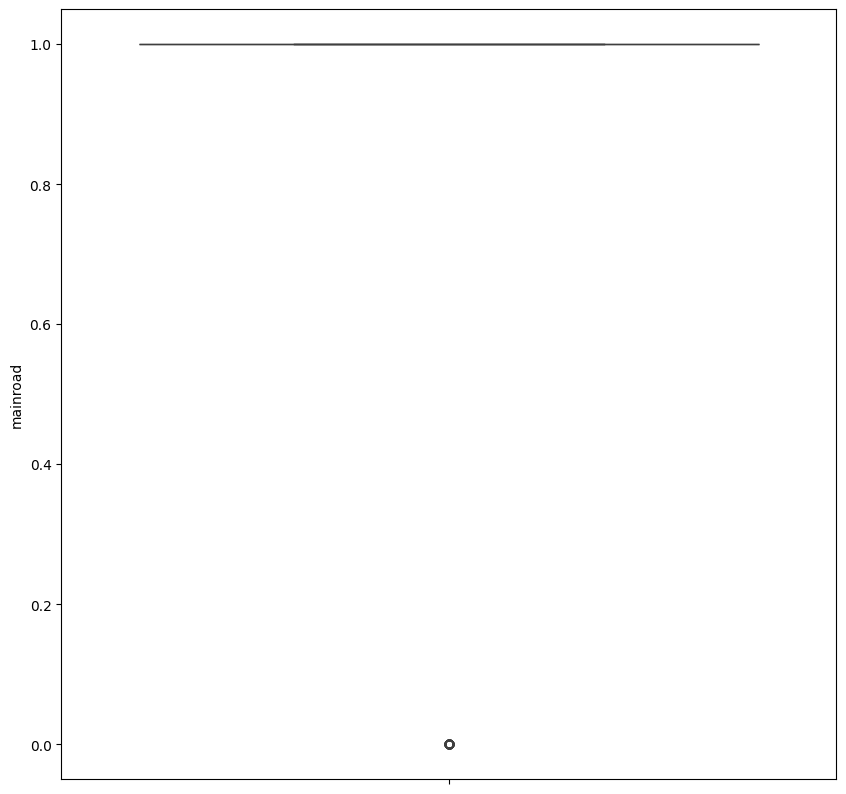

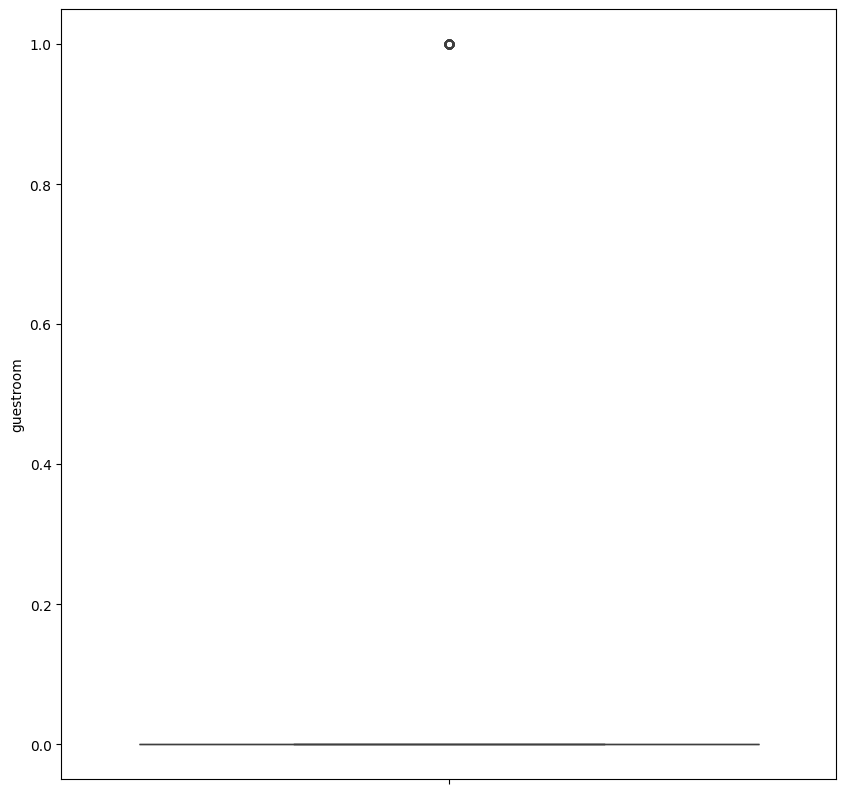

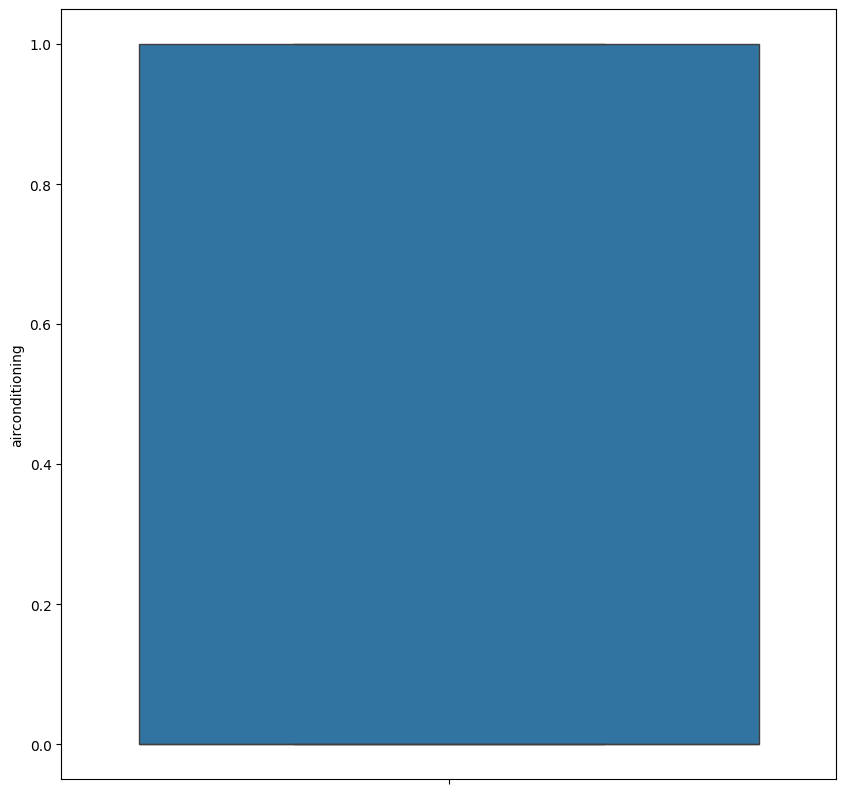

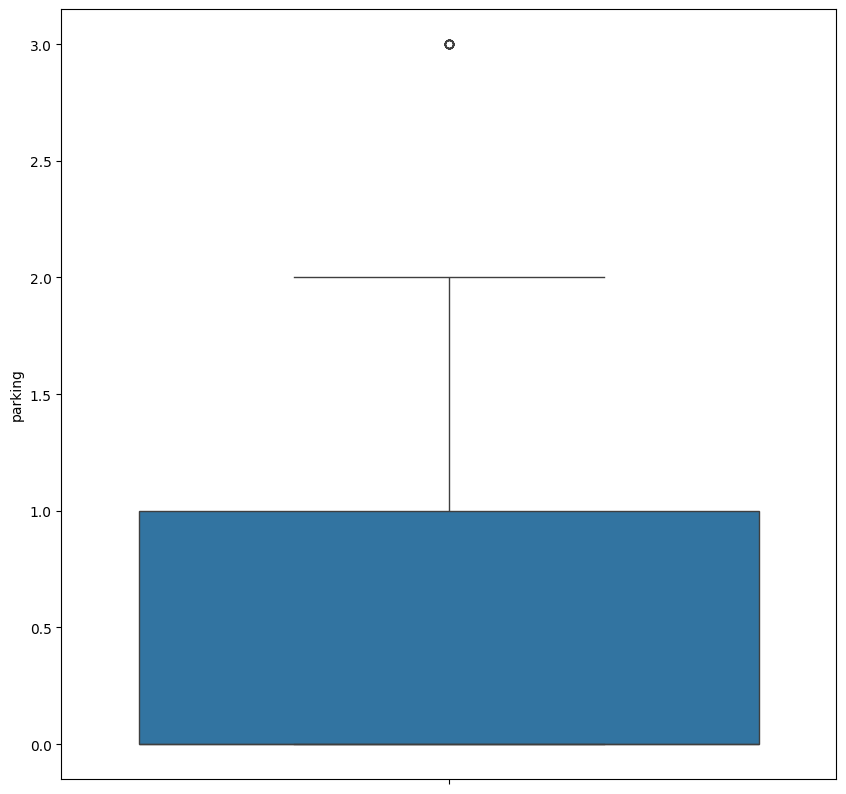

In [21]:
for col in X:
    plt.figure(figsize=(10,10))
    sns.boxplot(data[col])
    plt.show()

In [22]:
from sklearn.preprocessing import MinMaxScaler

In [23]:
for col in X:
    mm=MinMaxScaler()
    data[col]=mm.fit_transform(data[[col]])

In [24]:
X.head()

,area,bedrooms,bathrooms,mainroad,guestroom,airconditioning,parking
0,7420,4,2,1,0,1,2
1,8960,4,4,1,0,1,3
2,9960,3,2,1,0,0,2
3,7500,4,2,1,0,1,3
4,7420,4,1,1,1,1,2


Model Training

In [25]:
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [26]:
x_train,x_test,y_train,y_test = tts(X,Y,test_size=0.2,random_state=42)

In [27]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(436, 7) (109, 7) (436,) (109,)


Plot Heatmap

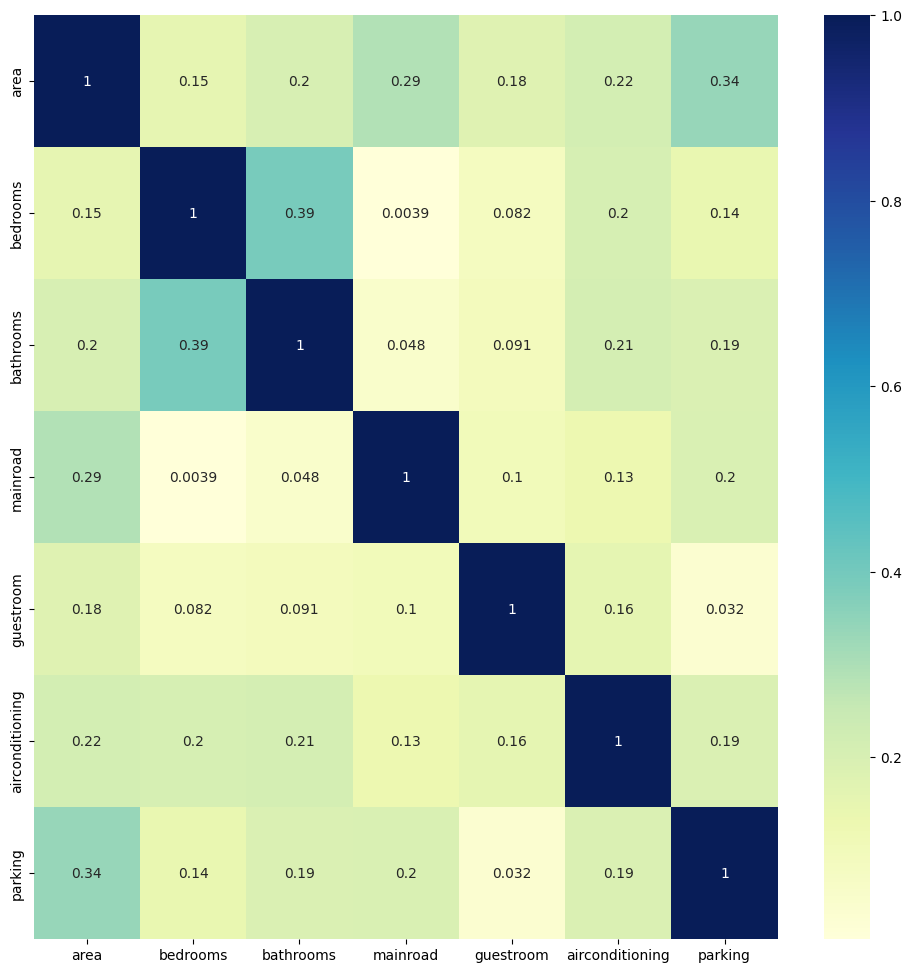

In [28]:
plt.figure(figsize = (12, 12))
sns.heatmap(x_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

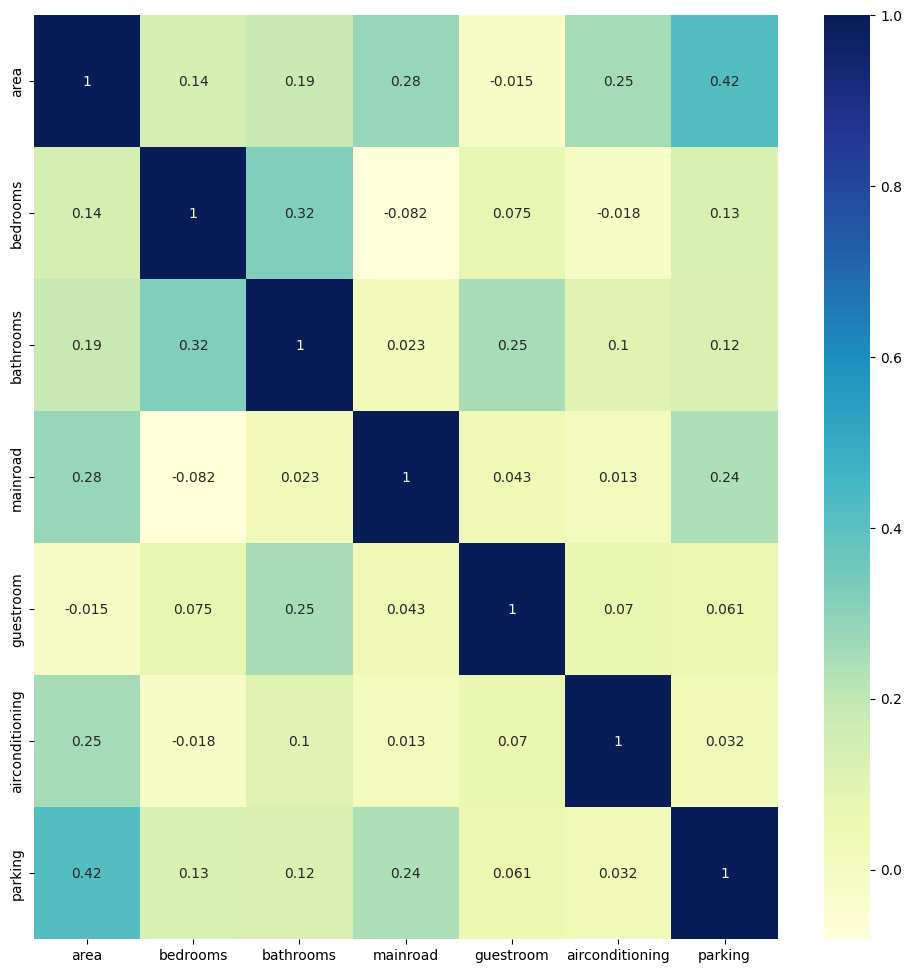

In [29]:
plt.figure(figsize = (12, 12))
sns.heatmap(x_test.corr(), annot = True, cmap="YlGnBu")
plt.show()

Train the Model

In [30]:
from sklearn.metrics import mean_squared_error

In [31]:
model = LinearRegression()

In [32]:
model.fit(x_train,y_train)

LinearRegression()

In [33]:
y_pred_test = model.predict(x_test)

In [34]:
y_pred_test

array([5181232.79681295, 6441669.63348246, 3389704.86558668,
       4857817.59797251, 3644641.35945172, 4294770.25856938,
       6176098.42949763, 5919244.64397568, 3304257.35619309,
       2678592.77269628, 8925054.70036936, 3364736.14699738,
       3613277.12245645, 2772814.35227855, 3646996.89894128,
       5886380.96461961, 2909174.80971711, 5337937.01252876,
       4334403.78857852, 3851390.6055398 , 4862528.67695162,
       5815384.35005828, 3297603.27154501, 4379198.98846106,
       5388864.19727329, 6777617.09646336, 3693609.40932046,
       5176711.47577239, 7278490.91061018, 3144728.75867278,
       5852784.76109328, 3691341.50792954, 6851573.45424629,
       4270037.09392903, 4110398.63763209, 6238682.59606726,
       4823043.09487814, 4702890.22065468, 3830524.98448859,
       4872638.49918466, 5080699.16545468, 4261327.87812174,
       6422825.31756601, 3945739.77280166, 4028056.06725655,
       5037067.49861736, 6323892.65900463, 4323164.32012366,
       4334276.20089892,

In [35]:
score = r2_score(y_test,y_pred_test)
score

0.5756079492400128

In [36]:
y_pred_train = model.predict(x_train)

In [37]:
y_pred_train

array([ 6568458.1246052 ,  7340253.79455317,  4794271.84382865,
        3326643.52836156,  3595175.03017103,  3891973.00585518,
        3618730.4250666 ,  3238268.95541495,  2791658.668195  ,
        4129882.49430041,  2777525.43125766,  4251832.31876444,
        5094421.7610787 ,  3552775.31935901,  4112928.89027966,
        5989372.59966946,  2607926.58800957,  6432785.70451715,
        3791349.62756287,  7553127.81752044,  6913867.69512529,
        3418509.56845428,  4904928.38776364,  6675512.75086462,
        5723923.81620005,  3571619.63527546,  2625054.90518833,
        3654063.51740995,  6209467.25188634,  3097340.57284446,
        3540997.62191123,  2201293.35101708,  3453842.66079763,
        5790240.54410461,  3461676.40769775,  4590619.36394729,
        2694543.32013026,  6667390.78316659,  5404337.57405179,
        5924931.17302223,  7265495.92884194,  5122971.28858711,
        4643430.05260473,  3390243.0945796 ,  3936190.02716384,
        3106890.31848228,  6350946.58071

In [38]:
score = r2_score(y_train,y_pred_train)
score

0.6145042207192635

In [39]:
model.score(x_test,y_test)

0.5756079492400128